# Analysation of latency data
In this notebook we want to analyse all the latency data



### what do i want to analyse?
- distribution of latency
- correlation between input size and latency measures

In [1]:
%load_ext autoreload
%autoreload 2

In [110]:
from utils import *
import pandas as pd
from pathlib import Path

## 1) Load Dataset

In [3]:
# Define root results directory
results_dir = Path('../results')

# Find all files containing "stats" and ending with .csv in all subdirectories
stats_files = sorted(results_dir.glob('**/*stats*.csv'))

# Find all files containing "raw" and ending with .csv in all subdirectories
raw_files = sorted(results_dir.glob('**/*raw*.csv'))

print(f"Found {len(stats_files)} stats CSV files and {len(raw_files)} raw CSV files:")

# Load all stats files into a dictionary of dataframes
stats_dfs = {}
for file_path in stats_files:
    try:
        df = pd.read_csv(file_path)
        # Strip whitespace from column names
        df.columns = df.columns.str.strip()
        # Create key: subfolder_name/filename_stem
        relative_path = file_path.relative_to(results_dir)
        key = str(relative_path.parent / relative_path.stem)
        stats_dfs[key] = df
        print(f"✅ {relative_path} -> shape {df.shape}")
    except Exception as e:
        print(f"❌ Error loading {file_path.name}: {e}")

# Load all raw files into a dictionary of dataframes
raw_dfs = {}
for file_path in raw_files:
    try:
        df = pd.read_csv(file_path)
        # Strip whitespace from column names
        df.columns = df.columns.str.strip()
        # Create key: subfolder_name/filename_stem
        relative_path = file_path.relative_to(results_dir)
        key = str(relative_path.parent / relative_path.stem)
        raw_dfs[key] = df
        print(f"✅ {relative_path} -> shape {df.shape}")
    except Exception as e:
        print(f"❌ Error loading {file_path.name}: {e}")

print(f"\n✅ Loaded {len(stats_dfs)} stats dataframes and {len(raw_dfs)} raw dataframes ✅")

Found 25 stats CSV files and 25 raw CSV files:
✅ cloud\cloud_stats_experiment_anthropic-claude-haiku-4-5_always_cloud_once-per-sec_2025-12-05T10-35-38.csv -> shape (3, 7)
✅ cloud\cloud_stats_experiment_google-gemini-2-5-flash-always_cloud_once_per_sec_2025-12-05T10-00-00.csv -> shape (3, 7)
✅ cloud\cloud_stats_experiment_google-gemma-3n-e4b-it_always_cloud_once-per-sec_2025-12-05T08-07-39.csv -> shape (3, 7)
✅ cloud\cloud_stats_experiment_ibm-granite-granite-4-0-h-micro_always_cloud_once-per-sec_2025-12-05T07-07-33.csv -> shape (3, 7)
✅ cloud\cloud_stats_experiment_meta-llama-llama-3-2-1b-instruct_always_cloud_once-per-sec_2025-12-04T16-10-54.csv -> shape (3, 7)
✅ cloud\cloud_stats_experiment_meta-llama-llama-3-2-3b-instruct_always_cloud_once-per-sec_2025-12-05T07-31-00.csv -> shape (3, 7)
✅ cloud\cloud_stats_experiment_openai-gpt-4o-mini_always_cloud_once-per-sec_2025-12-05T07-18-02.csv -> shape (3, 7)
✅ cloud\cloud_stats_experiment_qwen-qwen3-8b_always_cloud_once-per-sec_2025-12-05T0

In [4]:
# raw_dfs['fabian\\raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-03T20-41-45']

In [5]:
# Check the keys in raw_dfs
print("Available keys in raw_dfs:")
for key in raw_dfs.keys():
    print(key)

Available keys in raw_dfs:
cloud/cloud_raw_experiment_anthropic-claude-haiku-4-5_always_cloud_once-per-sec_2025-12-05T10-35-38
cloud/cloud_raw_experiment_google-gemini-2-5-flash-always_cloud_once_per_sec_2025-12-05T10-00-00
cloud/cloud_raw_experiment_google-gemma-3n-e4b-it_always_cloud_once-per-sec_2025-12-05T08-07-39
cloud/cloud_raw_experiment_ibm-granite-granite-4-0-h-micro_always_cloud_once-per-sec_2025-12-05T07-07-33
cloud/cloud_raw_experiment_meta-llama-llama-3-2-1b-instruct_always_cloud_once-per-sec_2025-12-04T16-10-54
cloud/cloud_raw_experiment_meta-llama-llama-3-2-3b-instruct_always_cloud_once-per-sec_2025-12-05T07-31-00
cloud/cloud_raw_experiment_openai-gpt-4o-mini_always_cloud_once-per-sec_2025-12-05T07-18-02
cloud/cloud_raw_experiment_qwen-qwen3-8b_always_cloud_once-per-sec_2025-12-05T07-52-16
fabian/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00
fabian/raw_experiment_Qwen3-4B-ONNX_always_device_once-per-sec_2025-12-06T10-14-33
fabia

## 2) Inference Time vs. Accuracy

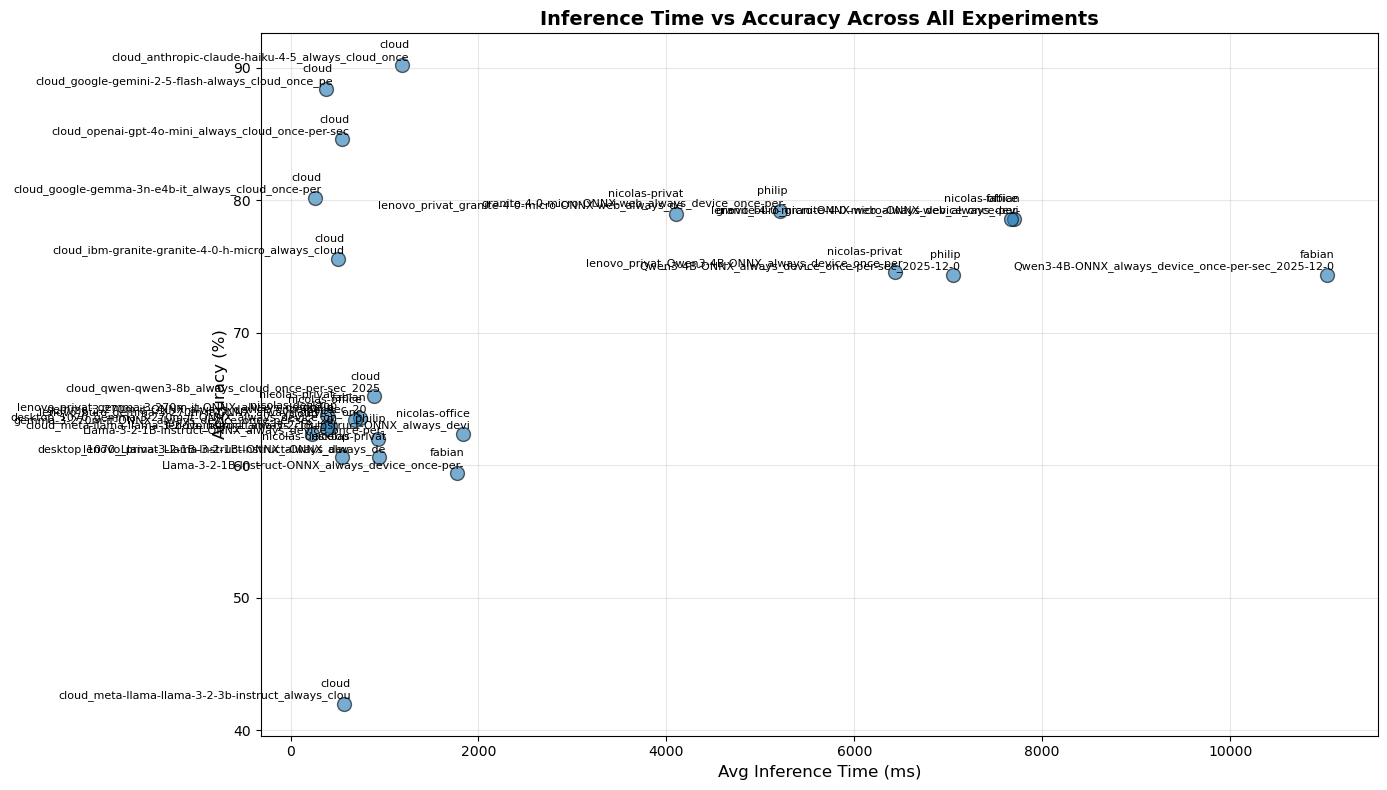

In [6]:
# Call the function with the stats_dfs dictionary
# TODO: shorten the labels (maybe just "granite micro" instead of ibm-granite-granite-4-0-h-micro). Would do this with a lookup table. Maybe add directly on data loading step.
# TODO: color the dots based on cloud vs. on device
# TODO: optional: make the size of the dots depending on the model size
scatterplot_inference_vs_accuracy(stats_dfs)

In [7]:
# plot_time_measure_distributions(raw_dfs['fabian/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00'], 'Llama Fabian')
# plot_time_measure_distributions(raw_dfs['philip\\raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53'], 'Llama Philip')
#plot_time_measure_distributions(raw_dfs['nicolas/lenovo_büro_raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T13-03-58'], 'Llama Nicolas Büro')


In [8]:
# Prepare the data for plotting
experiment_data = [
    raw_dfs['fabian/raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-03T20-41-45'],
    raw_dfs['philip/raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T08-01-13'],
    raw_dfs['nicolas/lenovo_büro_raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T12-44-34']
]

labels = ['gemma Fabian', 'gemma Philip', 'gemma Nicolas Büro']

# plot time measure distributions
plot_time_measures_overlaid(experiment_data, labels)

# plot inference vs input character amount
plot_characters_vs_inference_time(experiment_data, labels)

KeyError: 'nicolas/lenovo_büro_raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T12-44-34'

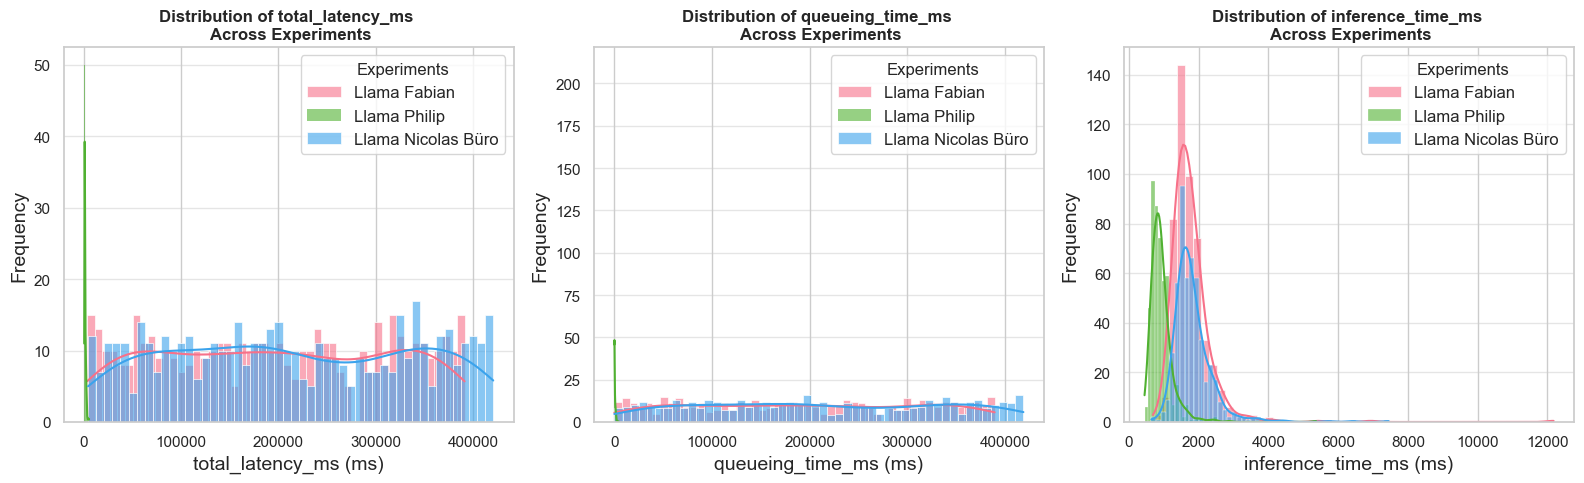

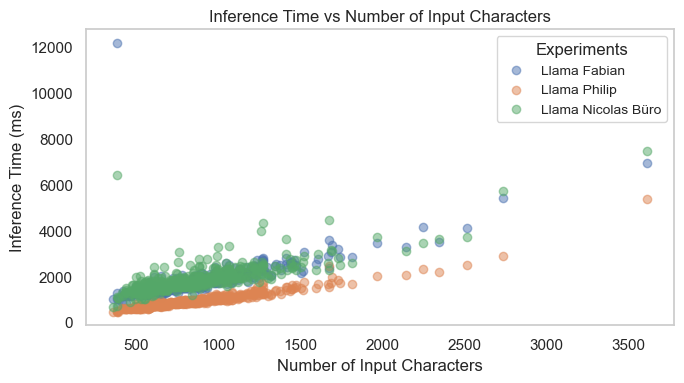

Correlation between number of characters and inference time for Llama Fabian: 0.6595012838309482
Correlation between number of characters and inference time for Llama Philip: 0.9475230235867872
Correlation between number of characters and inference time for Llama Nicolas Büro: 0.7711670339595154


In [ ]:
# Prepare the data for plotting
experiment_data = [
    raw_dfs['fabian/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00'],
    raw_dfs['philip/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53'],
    raw_dfs[
        'nicolas/lenovo_büro_raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T13-03-58']
]

labels = ['Llama Fabian', 'Llama Philip', 'Llama Nicolas Büro']

# plot time measure distributions
plot_time_measures_overlaid(experiment_data, labels)

# plot inference vs input character amount
plot_characters_vs_inference_time(experiment_data, labels)

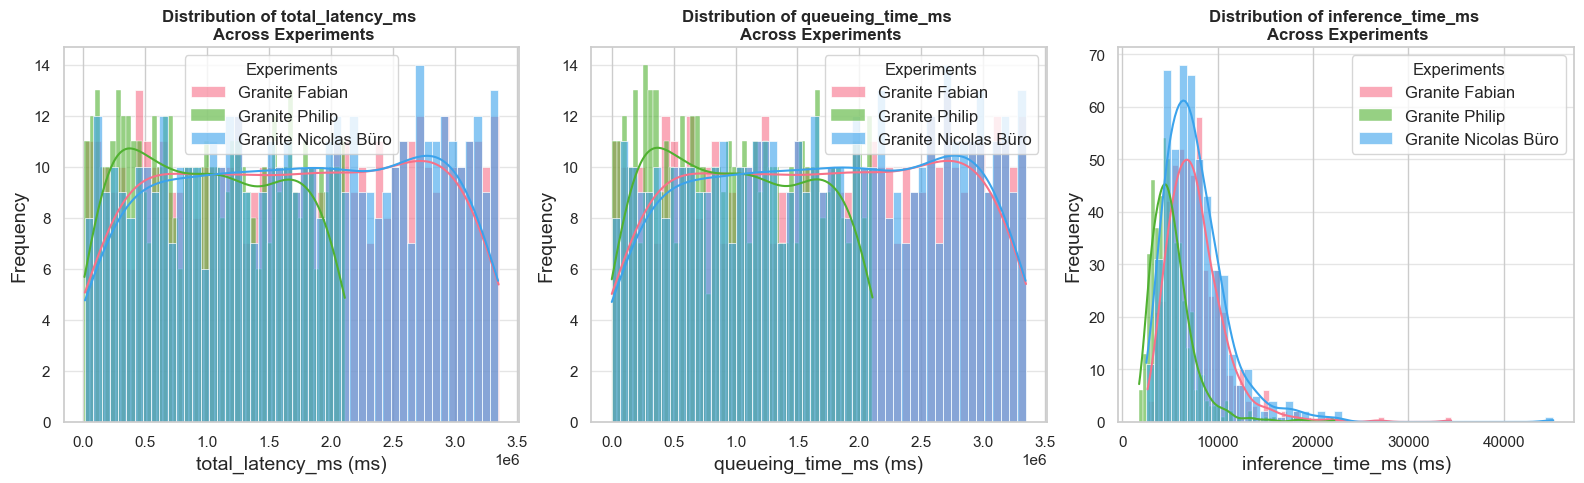

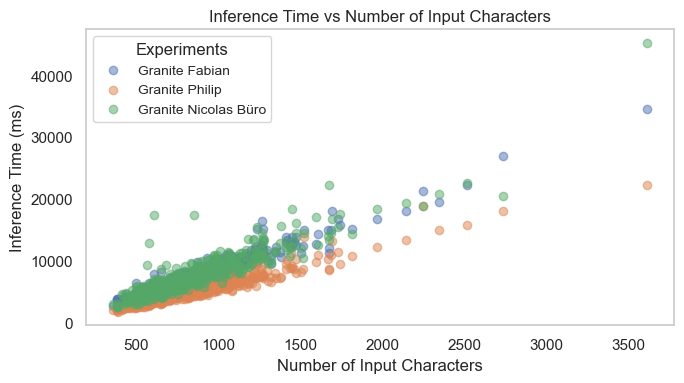

Correlation between number of characters and inference time for Granite Fabian: 0.9656557198442164
Correlation between number of characters and inference time for Granite Philip: 0.9535457786861865
Correlation between number of characters and inference time for Granite Nicolas Büro: 0.9125806954552317


In [ ]:
# Prepare the data for plotting
experiment_data_granite = [
    raw_dfs['fabian/raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-03T22-46-10'],
    # Updated key for Fabian
    raw_dfs['philip/raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T09-03-29'],
    # Correct key for Philip
    raw_dfs[
        'nicolas/lenovo_büro_raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T12-29-10']
    # Correct key for Nicolas
]

labels_granite = ['Granite Fabian', 'Granite Philip', 'Granite Nicolas Büro']

# Plot time measure distributions for Granite experiments
plot_time_measures_overlaid(experiment_data_granite, labels_granite)

# Plot inference vs input character amount for Granite experiments
plot_characters_vs_inference_time(experiment_data_granite, labels_granite)

## n) Analyisis of Latency per Model and Device
This analyiss is used to show the mean and median latency as well as the variance in latency for the on device models of different configurations. Those numbers can be copied to the report.

In [19]:
def analyze_latency_statistics_for_one_device(name: str, route: str = 'device') -> pd.DataFrame:
    # filter all the raw dataframes which contain name in their key (e.g. 'fabian' for all datasets from fabian)
    subset_raw_df = {key: df for key, df in raw_dfs.items() if name in key}

    latency_stats = {}
    for key, df in subset_raw_df.items():
        if 'inference_time_ms' not in df.columns:
            continue

        series = df['inference_time_ms'].dropna()
        mean_latency = series.mean()
        median_latency = series.median()
        std_latency = series.std()
        q25 = series.quantile(0.25)
        q75 = series.quantile(0.75)
        iqr_latency = q75 - q25

        mean_accuracy = df['exact_match'].mean() if 'exact_match' in df.columns else None
        device_model = df['device_model'][0]
        cloud_model = df['cloud_model'][0]

        model_name = cloud_model if route == 'cloud' else device_model

        latency_stats[model_name] = {
            'mean_latency_ms': round(mean_latency, 2),
            'median_latency_ms': round(median_latency, 2),
            'std_latency_ms': round(std_latency, 2),
            'iqr_latency_ms': round(iqr_latency, 2),
            'q25_latency_ms': round(q25, 2),
            'q75_latency_ms': round(q75, 2),
            'mean_accuracy': round(mean_accuracy, 2),
            'dataset_name': key
        }

    # convert to a dataframe
    return pd.DataFrame.from_dict(latency_stats, orient='index')


In [17]:
# print the dataframe
analyze_latency_statistics_for_one_device('fabian')

,mean_latency_ms,median_latency_ms,std_latency_ms,iqr_latency_ms,q25_latency_ms,q75_latency_ms,mean_accuracy,dataset_name
onnx-community/gemma-3-270m-it-ONNX,737.04,615.0,412.31,330.00,488.75,818.75,0.64,fabian\raw_experiment_gemma-3-270m-it-ONNX_alw...
onnx-community/granite-4.0-micro-ONNX-web,7697.68,7186.5,3188.96,3321.00,5633.75,8954.75,0.79,fabian\raw_experiment_granite-4-0-micro-ONNX-w...
onnx-community/Llama-3.2-1B-Instruct-ONNX,1773.50,1638.0,708.28,513.75,1436.50,1950.25,0.59,fabian\raw_experiment_Llama-3-2-1B-Instruct-ON...
onnx-community/Qwen3-4B-ONNX,11032.70,10638.0,4203.47,4612.75,8359.00,12971.75,0.74,fabian\raw_experiment_Qwen3-4B-ONNX_always_dev...


In [6]:
analyze_latency_statistics_for_one_device('philip')

,mean_latency_ms,median_latency_ms,std_latency_ms,iqr_latency_ms,q25_latency_ms,q75_latency_ms,mean_accuracy,dataset_name
onnx-community/gemma-3-270m-it-ONNX,387.39,351.0,245.20,117.25,308.75,426.00,0.63,philip\raw_experiment_gemma-3-270m-it-ONNX_alw...
onnx-community/granite-4.0-micro-ONNX-web,5210.40,4781.5,2337.95,2373.00,3694.75,6067.75,0.79,philip\raw_experiment_granite-4-0-micro-ONNX-w...
onnx-community/Llama-3.2-1B-Instruct-ONNX,932.35,856.0,359.42,342.50,717.00,1059.50,0.62,philip\raw_experiment_Llama-3-2-1B-Instruct-ON...
onnx-community/Qwen3-4B-ONNX,7051.97,6471.0,2908.20,3161.50,5103.50,8265.00,0.74,philip\raw_experiment_Qwen3-4B-ONNX_always_dev...


In [7]:
analyze_latency_statistics_for_one_device('nicolas-privat')

,mean_latency_ms,median_latency_ms,std_latency_ms,iqr_latency_ms,q25_latency_ms,q75_latency_ms,mean_accuracy,dataset_name
onnx-community/gemma-3-270m-it-ONNX,392.57,350.0,236.90,149.00,291.00,440.00,0.64,nicolas-privat\lenovo_privat_raw_experiment_ge...
onnx-community/granite-4.0-micro-ONNX-web,4102.27,3753.0,1927.83,1775.75,2993.25,4769.00,0.79,nicolas-privat\lenovo_privat_raw_experiment_gr...
onnx-community/Llama-3.2-1B-Instruct-ONNX,939.42,906.0,218.13,197.25,820.00,1017.25,0.61,nicolas-privat\lenovo_privat_raw_experiment_Ll...
onnx-community/Qwen3-4B-ONNX,6435.64,6273.5,2659.83,3006.00,4553.25,7559.25,0.75,nicolas-privat\lenovo_privat_raw_experiment_Qw...


In [8]:
analyze_latency_statistics_for_one_device('nicolas-office')

,mean_latency_ms,median_latency_ms,std_latency_ms,iqr_latency_ms,q25_latency_ms,q75_latency_ms,mean_accuracy,dataset_name
onnx-community/gemma-3-270m-it-ONNX,690.36,631.0,378.24,229.25,538.0,767.25,0.63,nicolas-office\lenovo_büro_raw_experiment_gemm...
onnx-community/granite-4.0-micro-ONNX-web,7671.17,6977.0,3608.71,3815.00,5310.5,9125.50,0.79,nicolas-office\lenovo_büro_raw_experiment_gran...
onnx-community/Llama-3.2-1B-Instruct-ONNX,1834.74,1719.5,608.60,467.75,1520.5,1988.25,0.62,nicolas-office\lenovo_büro_raw_experiment_Llam...


In [20]:
analyze_latency_statistics_for_one_device('cloud', 'cloud')

,mean_latency_ms,median_latency_ms,std_latency_ms,iqr_latency_ms,q25_latency_ms,q75_latency_ms,mean_accuracy,dataset_name
anthropic/claude-haiku-4.5,1190.50,1206.5,639.82,914.00,605.25,1519.25,0.90,cloud\cloud_raw_experiment_anthropic-claude-ha...
google/gemini-2.5-flash,373.37,345.0,178.02,122.25,286.00,408.25,0.88,cloud\cloud_raw_experiment_google-gemini-2-5-f...
google/gemma-3n-e4b-it,259.20,236.0,109.89,53.25,214.75,268.00,0.80,cloud\cloud_raw_experiment_google-gemma-3n-e4b...
ibm-granite/granite-4.0-h-micro,503.49,445.5,233.54,210.25,365.00,575.25,0.76,cloud\cloud_raw_experiment_ibm-granite-granite...
meta-llama/llama-3.2-1b-instruct,223.59,209.0,93.89,67.00,178.00,245.00,0.62,cloud\cloud_raw_experiment_meta-llama-llama-3-...
meta-llama/llama-3.2-3b-instruct,564.88,496.5,204.65,351.00,404.00,755.00,0.42,cloud\cloud_raw_experiment_meta-llama-llama-3-...
openai/gpt-4o-mini,550.64,486.0,262.23,166.25,418.00,584.25,0.85,cloud\cloud_raw_experiment_openai-gpt-4o-mini_...
qwen/qwen3-8b,884.05,876.0,103.58,47.25,859.00,906.25,0.65,cloud\cloud_raw_experiment_qwen-qwen3-8b_alway...


## 5) Prompt Characters vs. Latency Analysis
This analysis is used to show the correlation between input size (in tokens) and latency for different models and devices.

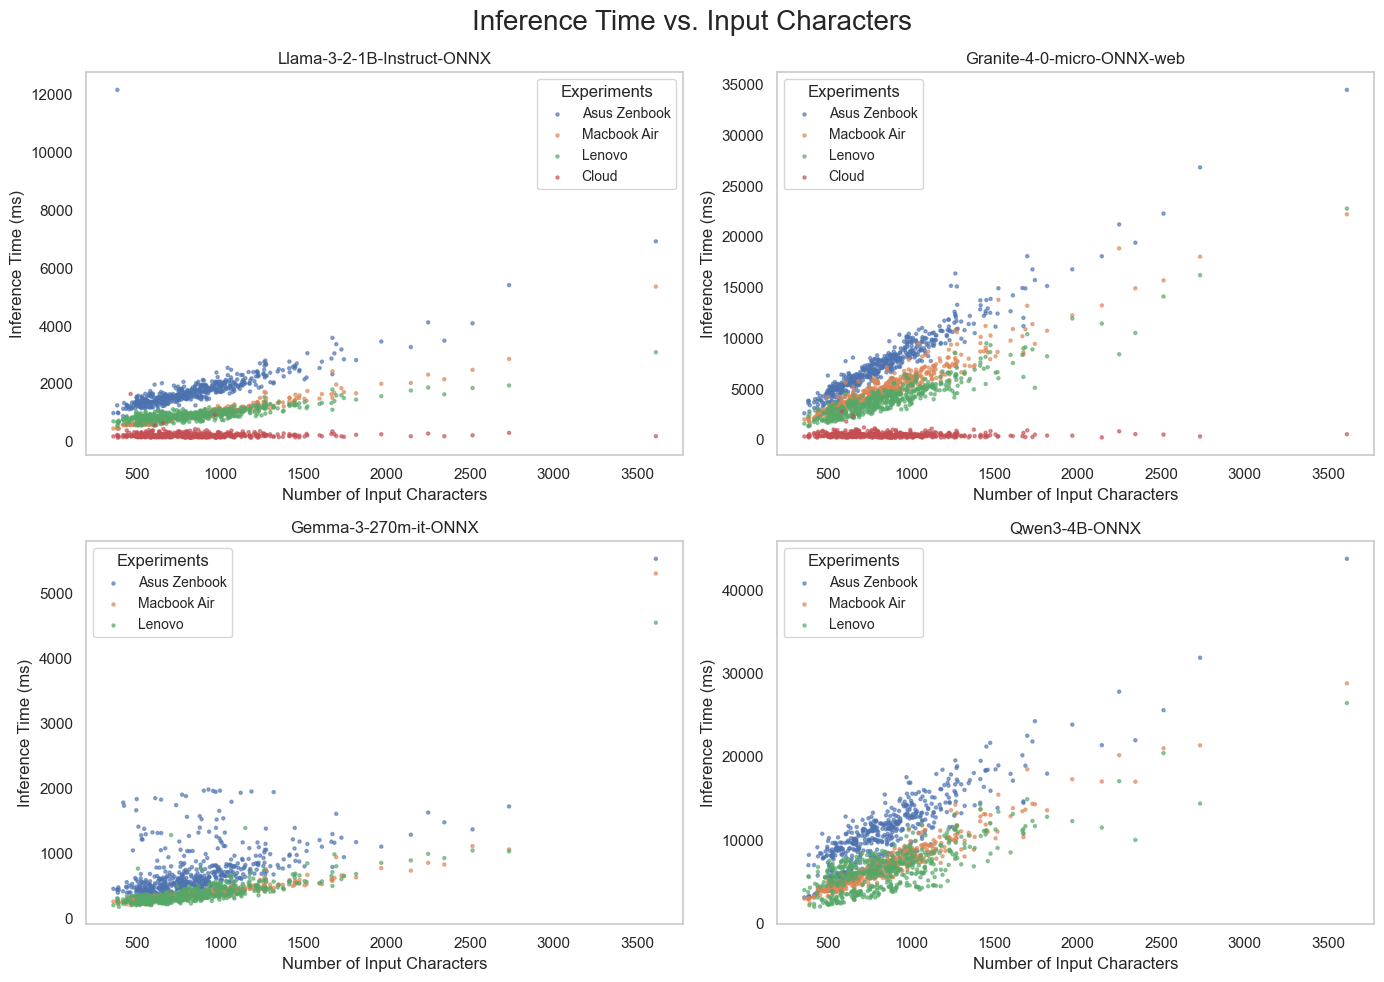

In [67]:
# Prepare the data for plotting
experiment_data = [
    [
        raw_dfs['fabian\\raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-03T20-58-00'],
        raw_dfs['philip\\raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53'],
        raw_dfs[
            'nicolas-privat\\lenovo_privat_raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-05T08-43-10'],
        raw_dfs[
            'cloud\\cloud_raw_experiment_meta-llama-llama-3-2-1b-instruct_always_cloud_once-per-sec_2025-12-04T16-10-54']
    ],
    [
        raw_dfs['fabian\\raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-03T22-46-10'],
        raw_dfs['philip\\raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-04T09-03-29'],
        raw_dfs[
            'nicolas-privat\\lenovo_privat_raw_experiment_granite-4-0-micro-ONNX-web_always_device_once-per-sec_2025-12-05T09-19-31'],
        raw_dfs[
            'cloud\\cloud_raw_experiment_ibm-granite-granite-4-0-h-micro_always_cloud_once-per-sec_2025-12-05T07-07-33']
    ],
    [
        raw_dfs['fabian\\raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-03T20-41-45'],
        raw_dfs['philip\\raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-04T08-01-13'],
        raw_dfs[
            'nicolas-privat\\lenovo_privat_raw_experiment_gemma-3-270m-it-ONNX_always_device_once-per-sec_2025-12-05T08-27-21']
    ],
    [
        raw_dfs['fabian\\raw_experiment_Qwen3-4B-ONNX_always_device_once-per-sec_2025-12-06T10-14-33'],
        raw_dfs['philip\\raw_experiment_Qwen3-4B-ONNX_always_device_once-per-sec_2025-12-04T10-12-42'],
        raw_dfs[
            'nicolas-privat\\lenovo_privat_raw_experiment_Qwen3-4B-ONNX_always_device_once-per-sec_2025-12-05T10-40-39']
    ]

]

labels = [
    ['Asus Zenbook', 'Macbook Air', 'Lenovo', 'Cloud'],
    ['Asus Zenbook', 'Macbook Air', 'Lenovo', 'Cloud'],
    ['Asus Zenbook', 'Macbook Air', 'Lenovo'],
    ['Asus Zenbook', 'Macbook Air', 'Lenovo']
]

model_names = [
    'Llama-3-2-1B-Instruct-ONNX',
    'Granite-4-0-micro-ONNX-web',
    'Gemma-3-270m-it-ONNX',
    'Qwen3-4B-ONNX'
]


# plot inference vs input character amount
plot_characters_vs_inference_time(experiment_data, labels, model_names)

In [51]:
print("Correlation Analysis between Input Characters and Inference Time for Llama:")
calc_correlation_characters_inference(experiment_data[0], labels[0])

Correlation Analysis between Input Characters and Inference Time for Llama:
Correlation between number of characters and inference time for Llama Asus Zenbook: 0.6595012838309481
Correlation between number of characters and inference time for Llama Macbook Air: 0.9475230235867868
Correlation between number of characters and inference time for Llama Lenovo: 0.853040229295981
Correlation between number of characters and inference time for Llama Cloud: -0.04270329808217121


In [52]:
print("Correlation Analysis between Input Characters and Inference Time for Granite:")
calc_correlation_characters_inference(experiment_data[1], labels[1])

Correlation Analysis between Input Characters and Inference Time for Granite:
Correlation between number of characters and inference time for Granite Asus Zenbook: 0.9656557198442163
Correlation between number of characters and inference time for Granite Macbook Air: 0.9535457786861865
Correlation between number of characters and inference time for Granite Lenovo: 0.9261621308136515
Correlation between number of characters and inference time for Granite Cloud: -0.049590679828418124


In [54]:
print("Correlation Analysis between Input Characters and Inference Time for Gemma:")
calc_correlation_characters_inference(experiment_data[2], labels[2])

Correlation Analysis between Input Characters and Inference Time for Gemma:
Correlation between number of characters and inference time for Gemma Asus Zenbook: 0.5547252047465917
Correlation between number of characters and inference time for Gemma Macbook Air: 0.7049180635731205
Correlation between number of characters and inference time for Gemma Lenovo: 0.7262039748593994


In [53]:
print("Correlation Analysis between Input Characters and Inference Time for Qwen:")
calc_correlation_characters_inference(experiment_data[3], labels[3])

Correlation Analysis between Input Characters and Inference Time for Qwen:
Correlation between number of characters and inference time for Qwen3 Asus Zenbook: 0.8817475919645448
Correlation between number of characters and inference time for Qwen3 Macbook Air: 0.9540238631275897
Correlation between number of characters and inference time for Qwen3 Lenovo: 0.7697908912829232


## 6) Distribution of Inference Time
This section explores how the inference time is distributed for different models and devices.

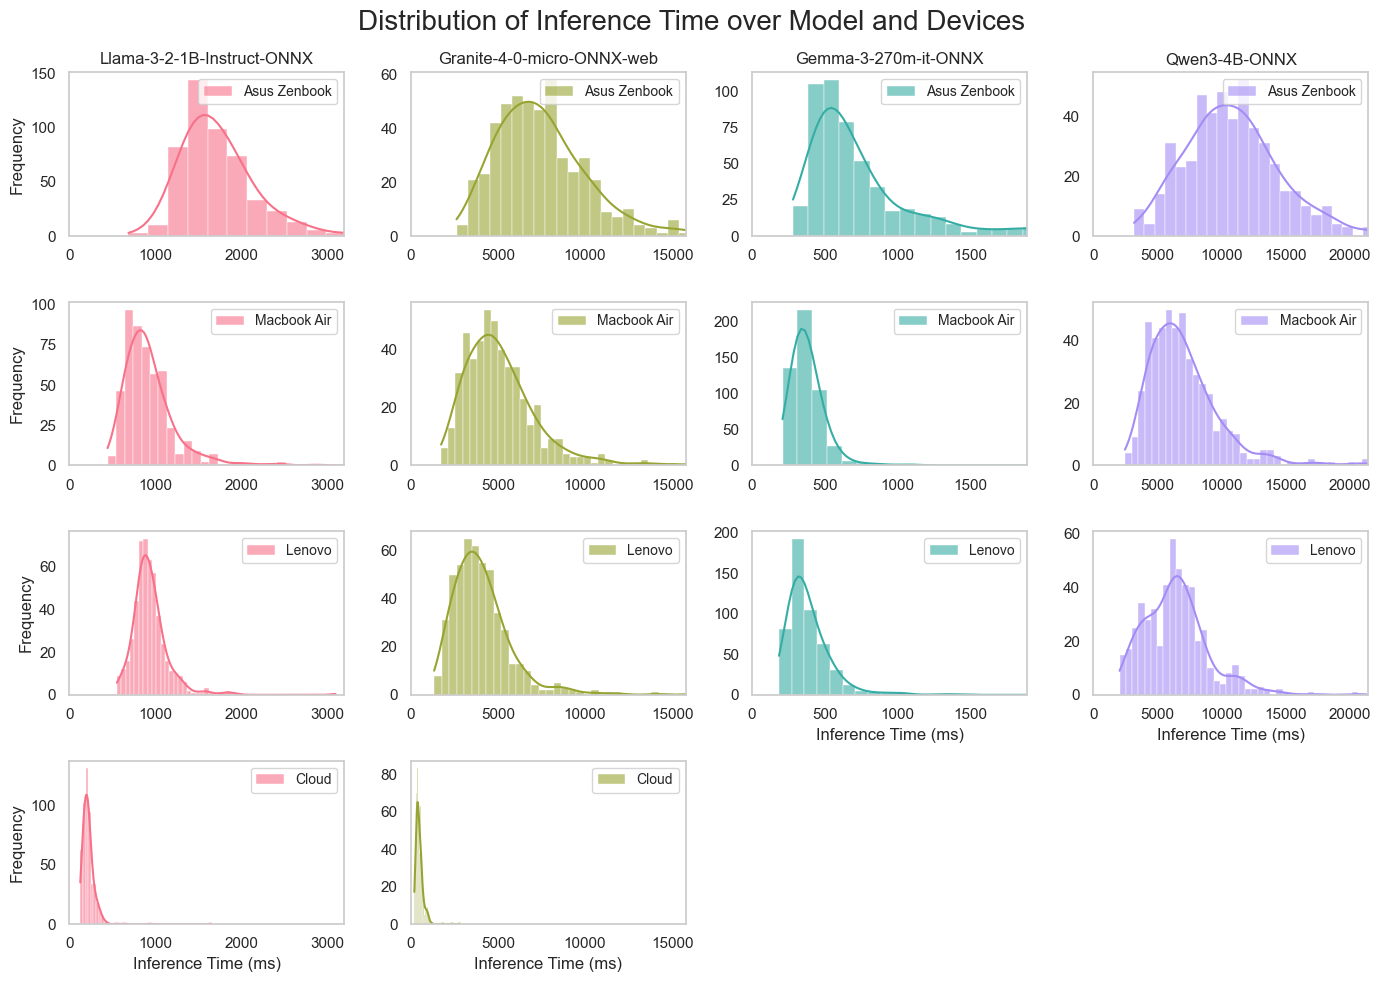

In [96]:
plot_inference_time_distribution(experiment_data, labels, model_names)

## 7) Analysis of Warmup Effects
This section analyzes whether there are warmup effects in the latency data, i.e., whether the latency decreases over time as the model "warms up".

In [138]:
# select from each experiment the first 50 and last 50 samples
def analyze_warmup_effects(experiment_data, labels):
    for data_list, label_list in zip(experiment_data, labels):
        for df, label in zip(data_list, label_list):
            # Sort by job_start_ts to ensure chronological order
            df_sorted = df.sort_values('job_start_ts').reset_index(drop=True)
            first = df_sorted['inference_time_ms'].iloc[0]
            second = df_sorted['inference_time_ms'].iloc[1]
            diff_first_two = first - second

            # get reduction of time in percentage
            reduction_percentage = (diff_first_two / first) * 100

            print(f"{label}: Mean Inference Time - Difference in first two items: {diff_first_two:.2f} ms, {reduction_percentage:2f}% reduction")

In [139]:
analyze_warmup_effects(experiment_data, labels)

Asus Zenbook: Mean Inference Time - Difference in first two items: 1258.00 ms, 35.041783% reduction
Macbook Air: Mean Inference Time - Difference in first two items: 915.00 ms, 37.685338% reduction
Lenovo: Mean Inference Time - Difference in first two items: 695.00 ms, 38.632574% reduction
Cloud: Mean Inference Time - Difference in first two items: 177.00 ms, 50.427350% reduction
Asus Zenbook: Mean Inference Time - Difference in first two items: 806.00 ms, 6.698803% reduction
Macbook Air: Mean Inference Time - Difference in first two items: 195.00 ms, 2.259560% reduction
Lenovo: Mean Inference Time - Difference in first two items: 2810.00 ms, 31.139184% reduction
Cloud: Mean Inference Time - Difference in first two items: 152.00 ms, 21.745351% reduction
Asus Zenbook: Mean Inference Time - Difference in first two items: 507.00 ms, 38.910207% reduction
Macbook Air: Mean Inference Time - Difference in first two items: 22.00 ms, 3.642384% reduction
Lenovo: Mean Inference Time - Difference 

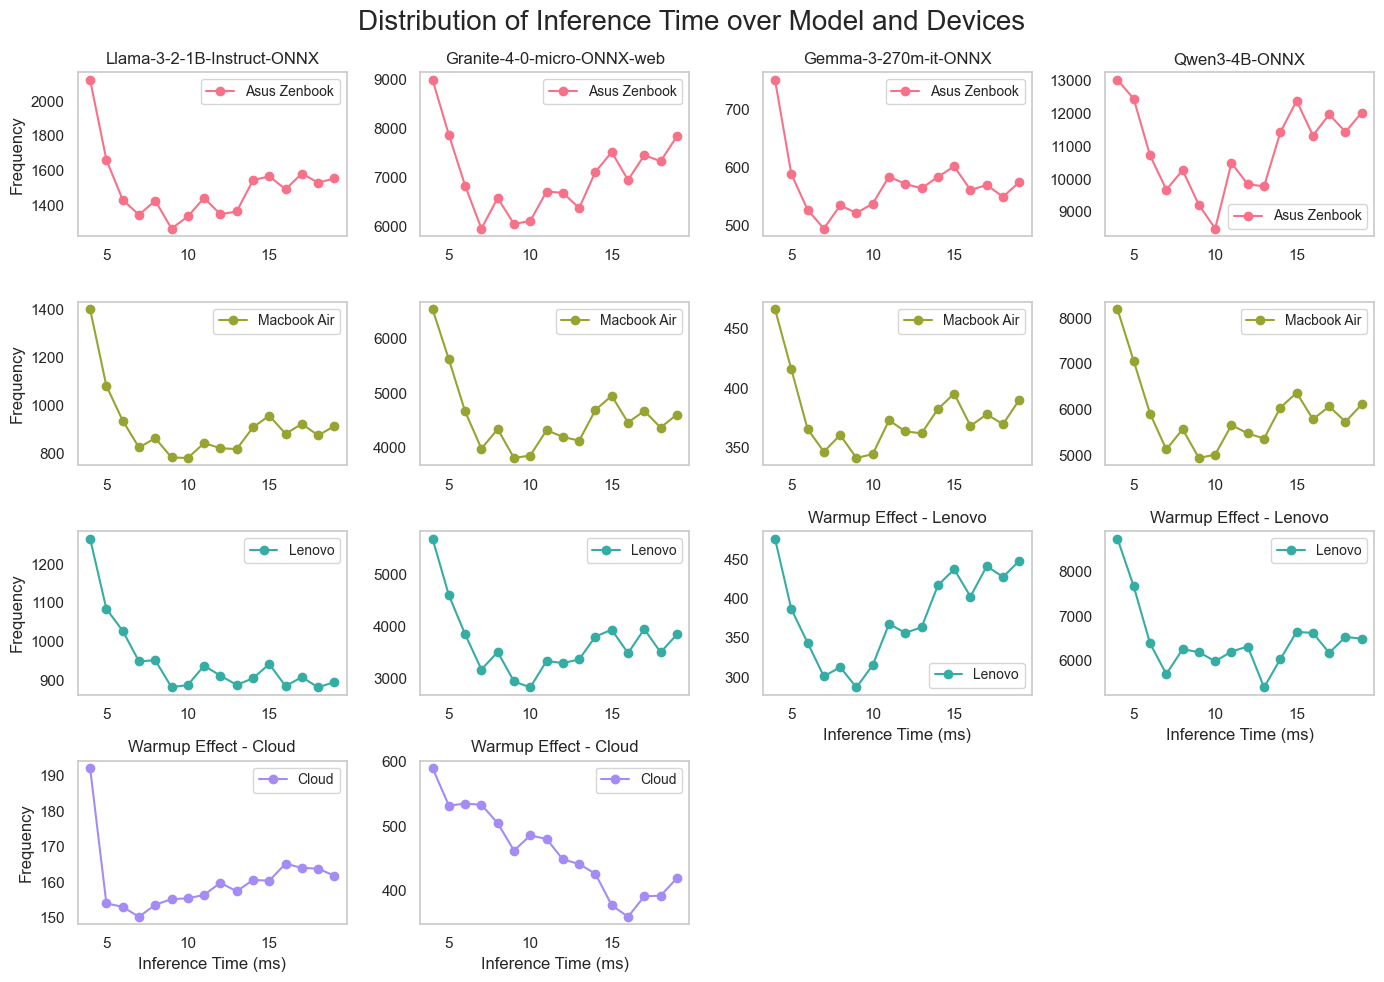

In [133]:
plot_warm_up_phase(experiment_data, labels, model_names)

In [122]:
experiment_data[1][3]

,dataset_item_id,route,latency_ms,total_latency_ms,queueing_time_ms,inference_time_ms,exact_match,ground_truth,answer,job_start_ts,...,inference_end_ts,prompt,number_of_words,number_of_characters,experiment_start_time_ms,experiment_end_time_ms,route_strategy,pattern,device_model,cloud_model
0,1,cloud,699.1,709.0,10.0,699.0,1,False,False,1764917948224,...,1764917948933,Question: does ethanol take more energy make t...,245,1674,1764917948116,1764918453962,always_cloud,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,ibm-granite/granite-4.0-h-micro
1,2,cloud,547.1,558.0,11.0,547.0,1,True,True,1764917949228,...,1764917949786,Question: is house tax and property tax are sa...,219,1507,1764917948116,1764918453962,always_cloud,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,ibm-granite/granite-4.0-h-micro
2,3,cloud,572.1,583.0,11.0,572.0,1,True,True,1764917950232,...,1764917950815,Question: is pain experienced in a missing bod...,85,654,1764917948116,1764918453962,always_cloud,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,ibm-granite/granite-4.0-h-micro
3,4,cloud,524.3,535.0,11.0,524.0,1,True,True,1764917951233,...,1764917951768,Question: is harry potter and the escape from ...,117,880,1764917948116,1764918453962,always_cloud,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,ibm-granite/granite-4.0-h-micro
4,5,cloud,607.9,618.0,10.0,608.0,1,True,True,1764917952236,...,1764917952854,Question: is there a difference between hydrox...,77,675,1764917948116,1764918453962,always_cloud,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,ibm-granite/granite-4.0-h-micro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,cloud,424.3,434.0,10.0,424.0,1,True,True,1764918447416,...,1764918447850,Question: is there gonna be a new halloween mo...,148,1058,1764917948116,1764918453962,always_cloud,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,ibm-granite/granite-4.0-h-micro
496,497,cloud,423.9,434.0,10.0,424.0,1,True,True,1764918448426,...,1764918448860,Question: is bayern munich the same as bayern ...,104,770,1764917948116,1764918453962,always_cloud,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,ibm-granite/granite-4.0-h-micro
497,498,cloud,324.4,328.0,4.0,324.0,1,True,True,1764918449441,...,1764918449769,Question: does the florida constitution give a...,66,520,1764917948116,1764918453962,always_cloud,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,ibm-granite/granite-4.0-h-micro
498,499,cloud,493.8,505.0,11.0,494.0,1,False,False,1764918450442,...,1764918450947,Question: can a puerto rican resident vote for...,142,1022,1764917948116,1764918453962,always_cloud,once-per-sec,onnx-community/gemma-3-270m-it-ONNX,ibm-granite/granite-4.0-h-micro


# Queueing Models
Here we try to simulate a queueing model that behaves like the empirically generated data. In a second step we then want to combine on-device and cloud into a multi-server model, to come up with a smart decision policy.

In [14]:
from utils import *

In [15]:
lambda_val, mu_val, s_times, ia_times = fit_mm1_model(
    raw_dfs['philip/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53'])

--- M/M/1 Fit Results ---
Estimated λ (Arrival Rate): 0.9932 jobs/sec
Estimated μ (Service Rate): 1.0726 jobs/sec
Traffic Intensity (ρ): 0.9260

Comparison (Seconds):
Theoretical Avg Total Latency (W): 12.5977 s
Empirical Avg Total Latency:     1.4275 s
Theoretical Avg Queue Time (Wq): 11.6654 s
Empirical Avg Queue Time:        0.4951 s


In [16]:
# 1. Get rates from On-Device Experiment
print("--- On-Device Data ---")
lambda_device, mu_device, _, _ = fit_mm1_model(
    raw_dfs['philip/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53'])

# 2. Get rates from Cloud Experiment
print("\n--- Cloud Data ---")
cloud_key = 'cloud/cloud_raw_experiment_meta-llama-llama-3-2-1b-instruct_always_cloud_once-per-sec_2025-12-04T16-10-54'
lambda_cloud, mu_cloud, _, _ = fit_mm1_model(raw_dfs[cloud_key])

# 3. Combine them into a 2-Server System
# We assume the total arrival rate is the sum of both experiments (or you can set a target lambda)
total_lambda = lambda_device + lambda_cloud

print("\n--- Combined System (M/M/2) ---")
# We pass the two different service rates
fit_mmc_model(total_lambda, [mu_device, mu_cloud], c=2)

--- On-Device Data ---
--- M/M/1 Fit Results ---
Estimated λ (Arrival Rate): 0.9932 jobs/sec
Estimated μ (Service Rate): 1.0726 jobs/sec
Traffic Intensity (ρ): 0.9260

Comparison (Seconds):
Theoretical Avg Total Latency (W): 12.5977 s
Empirical Avg Total Latency:     1.4275 s
Theoretical Avg Queue Time (Wq): 11.6654 s
Empirical Avg Queue Time:        0.4951 s

--- Cloud Data ---
--- M/M/1 Fit Results ---
Estimated λ (Arrival Rate): 0.9936 jobs/sec
Estimated μ (Service Rate): 4.4725 jobs/sec
Traffic Intensity (ρ): 0.2222

Comparison (Seconds):
Theoretical Avg Total Latency (W): 0.2874 s
Empirical Avg Total Latency:     0.2355 s
Theoretical Avg Queue Time (Wq): 0.0639 s
Empirical Avg Queue Time:        0.0119 s

--- Combined System (M/M/2) ---
--- M/M/2 Model Results ---
Combined Arrival Rate (λ): 1.9868
Avg Service Rate (μ): 2.7725
Traffic Intensity (ρ): 0.3583
Theoretical Avg Queue Time (Wq): 0.0531 s
Theoretical Avg Total Latency (W): 0.4138 s


(np.float64(0.4138023166752707), np.float64(0.05312160231169754))

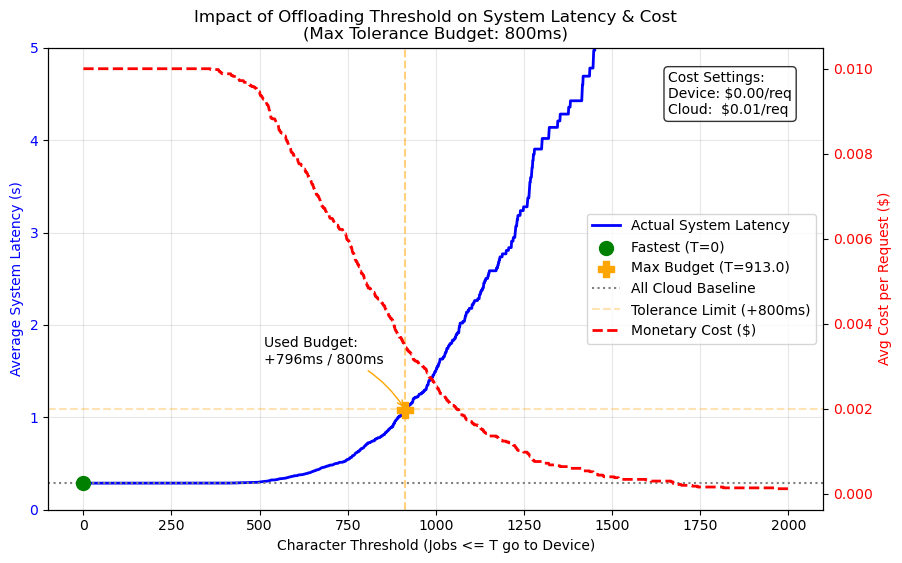

--- Performance vs. Budget Analysis ---
1. Fastest Configuration:
   - Threshold: 0 chars
   - Latency:   0.2874 s
   - Avg Cost:  $0.0100

2. Max Budget Configuration (Spending up to 800ms):
   - Threshold: 913.0 chars
   - Latency:   1.0830 s (+795.6ms)
   - Avg Cost:  $0.0035

   -> You save $0.0065 per request by using your latency budget.


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def analyze_split_strategy(device_df, cloud_df, thresholds, tolerance_ms=0, cost_device=0.0, cost_cloud=0.0):
    """
    Analyzes the performance of splitting traffic based on input character length.
    
    Args:
        tolerance_ms: How many milliseconds of extra latency we are willing to tolerate 
                      to keep a job on-device. (Subtracts this from device latency cost).
        cost_device: Monetary/Resource cost per request for on-device.
        cost_cloud: Monetary/Resource cost per request for cloud.
    """
    results = []

    # 1. Combine data to simulate the full incoming stream
    workload_df = device_df.copy()

    # Calculate total arrival rate of the system
    workload_df = workload_df.sort_values('job_start_ts')
    inter_arrival_times = workload_df['job_start_ts'].diff().dropna() / 1000.0
    lambda_total = 1.0 / inter_arrival_times.mean()

    for T in thresholds:
        # --- Split the Workload ---
        short_jobs = workload_df[workload_df['number_of_characters'] <= T]
        long_jobs = workload_df[workload_df['number_of_characters'] > T]

        # Probability of being short/long
        p_short = len(short_jobs) / len(workload_df)
        p_long = 1.0 - p_short

        # Arrival rates for each subsystem
        lambda_device = lambda_total * p_short
        lambda_cloud = lambda_total * p_long

        # --- Estimate Service Rates (Mu) ---
        if len(short_jobs) > 0:
            mu_device = 1.0 / (short_jobs['inference_time_ms'].mean() / 1000.0)
        else:
            mu_device = 0

        if len(long_jobs) > 0:
            mu_cloud = 1.0 / (cloud_df['inference_time_ms'].mean() / 1000.0)
        else:
            mu_cloud = 0

        # --- Calculate M/M/1 Metrics ---
        # Device Queue
        if lambda_device > 0 and mu_device > lambda_device:
            W_device = 1.0 / (mu_device - lambda_device)
        elif lambda_device == 0:
            W_device = 0
        else:
            W_device = float('inf')  # Unstable

        # Cloud Queue
        if lambda_cloud > 0 and mu_cloud > lambda_cloud:
            W_cloud = 1.0 / (mu_cloud - lambda_cloud)
        elif lambda_cloud == 0:
            W_cloud = 0
        else:
            W_cloud = float('inf')  # Unstable

        # --- Weighted Average System Latency & Costs ---
        if W_device == float('inf') or W_cloud == float('inf'):
            avg_system_latency = float('inf')
            adjusted_cost = float('inf')
            monetary_cost = float('inf')
        else:
            avg_system_latency = p_short * W_device + p_long * W_cloud

            # Monetary Cost Calculation
            monetary_cost = p_short * cost_device + p_long * cost_cloud

            # Apply tolerance: We perceive on-device latency as "cheaper" by tolerance_ms
            # Effective Cost = p_short * (W_device - tolerance) + p_long * W_cloud
            perceived_device_latency = max(0, W_device - (tolerance_ms / 1000.0))
            adjusted_cost = p_short * perceived_device_latency + p_long * W_cloud

        results.append({
            'threshold': T,
            'avg_latency': avg_system_latency,
            'adjusted_cost': adjusted_cost,
            'monetary_cost': monetary_cost,
            'lambda_device': lambda_device,
            'lambda_cloud': lambda_cloud,
            'p_short': p_short
        })

    return pd.DataFrame(results)


# --- Run the Analysis ---
thresholds = range(0, 2000, 1)
tolerance = 800  # We are willing to wait longer on device to save cloud costs/privacy

# Define Costs (e.g., arbitrary units or $)
cost_device_per_req = 0.00  # Free (already bought hardware)
cost_cloud_per_req = 0.01  # e.g., 1 cent per request

# Load your dataframes
df_device = raw_dfs['philip/raw_experiment_Llama-3-2-1B-Instruct-ONNX_always_device_once-per-sec_2025-12-04T08-10-53']
df_cloud = raw_dfs[
    'cloud/cloud_raw_experiment_meta-llama-llama-3-2-1b-instruct_always_cloud_once-per-sec_2025-12-04T16-10-54']

# Calculate
results_df = analyze_split_strategy(df_device, df_cloud, thresholds,
                                    tolerance_ms=tolerance,
                                    cost_device=cost_device_per_req,
                                    cost_cloud=cost_cloud_per_req)

# --- Find Key Points (Calculations) ---
# 1. Find the point of minimum REAL latency (Performance)
min_latency_idx = results_df['avg_latency'].idxmin()
min_latency_threshold = results_df.loc[min_latency_idx, 'threshold']
min_latency_val = results_df.loc[min_latency_idx, 'avg_latency']
min_monetary = results_df.loc[min_latency_idx, 'monetary_cost']

# 2. Budget Constraint Logic
target_latency = min_latency_val + (tolerance / 1000.0)

# Filter: valid latencies, within budget, and at least as much offloading as the fastest point
budget_candidates = results_df[
    (results_df['avg_latency'] <= target_latency) &
    (results_df['threshold'] >= min_latency_threshold)
    ]

if not budget_candidates.empty:
    # Pick the largest threshold (max offloading) that fits the budget
    budget_row = budget_candidates.loc[budget_candidates['threshold'].idxmax()]
    budget_threshold = budget_row['threshold']
    budget_latency = budget_row['avg_latency']
    budget_monetary = budget_row['monetary_cost']
else:
    budget_threshold = min_latency_threshold
    budget_latency = min_latency_val
    budget_monetary = min_monetary

# --- Plotting ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# 1. Plot the REAL latency curve (Left Axis)
ax1.plot(results_df['threshold'], results_df['avg_latency'],
         color='blue', linewidth=2, label='Actual System Latency')
ax1.set_xlabel('Character Threshold (Jobs <= T go to Device)')
ax1.set_ylabel('Average System Latency (s)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(0, max(results_df['avg_latency'].min() * 3, 5))

# 2. Plot the Cost curve (Right Axis)
ax2 = ax1.twinx()
ax2.plot(results_df['threshold'], results_df['monetary_cost'],
         color='red', linestyle='--', linewidth=2, label='Monetary Cost ($)')
ax2.set_ylabel('Avg Cost per Request ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 3. Mark the points (on Latency Axis)
ax1.scatter(min_latency_threshold, min_latency_val, color='green', s=100, zorder=5,
            label=f'Fastest (T={min_latency_threshold})')
ax1.scatter(budget_threshold, budget_latency, color='orange', s=120, marker='P', zorder=6,
            label=f'Max Budget (T={budget_threshold})')

# 4. Add reference lines
ax1.axhline(y=results_df.iloc[0]['avg_latency'], color='gray', linestyle=':', label='All Cloud Baseline')
ax1.axhline(y=target_latency, color='orange', linestyle='--', alpha=0.3, label=f'Tolerance Limit (+{tolerance}ms)')
ax1.axvline(x=budget_threshold, color='orange', linestyle='--', alpha=0.5)

# 5. Annotate
latency_penalty = budget_latency - min_latency_val
ax1.annotate(f"Used Budget:\n+{latency_penalty * 1000:.0f}ms / {tolerance}ms",
             xy=(budget_threshold, budget_latency),
             xytext=(budget_threshold - 400, budget_latency + 0.5),
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2", color='orange'))

# 6. Combine Legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center right')

# 7. Add Cost Info Text
info_text = (f"Cost Settings:\n"
             f"Device: ${cost_device_per_req:.2f}/req\n"
             f"Cloud:  ${cost_cloud_per_req:.2f}/req")
ax1.text(0.8, 0.95, info_text, transform=ax1.transAxes,
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title(f'Impact of Offloading Threshold on System Latency & Cost\n(Max Tolerance Budget: {tolerance}ms)')
ax1.grid(True, alpha=0.3)
plt.show()

# --- Print Analysis ---
print(f"--- Performance vs. Budget Analysis ---")
print(f"1. Fastest Configuration:")
print(f"   - Threshold: {min_latency_threshold} chars")
print(f"   - Latency:   {min_latency_val:.4f} s")
print(f"   - Avg Cost:  ${min_monetary:.4f}")

print(f"\n2. Max Budget Configuration (Spending up to {tolerance}ms):")
print(f"   - Threshold: {budget_threshold} chars")
print(f"   - Latency:   {budget_latency:.4f} s (+{(budget_latency - min_latency_val) * 1000:.1f}ms)")
print(f"   - Avg Cost:  ${budget_monetary:.4f}")

savings = min_monetary - budget_monetary
if savings > 0:
    print(f"\n   -> You save ${savings:.4f} per request by using your latency budget.")
# ...existing code...